In [40]:
import numpy as np
import keras
import pandas
from keras_tqdm import TQDMNotebookCallback

data = np.array(pandas.read_csv("~/trainingdata.csv", header=0))

print(data.shape)
display(data)

(72, 7)


array([[-45.4       , -46.8       , -49.        , -53.        ,
        -55.        , -56.        ,   0.        ],
       [-43.6       , -47.        , -44.8       , -53.6       ,
        -58.75      , -57.8       ,   1.        ],
       [-43.4       , -49.4       , -44.6       , -51.8       ,
        -61.6       , -58.        ,   1.        ],
       [-43.        , -49.2       , -43.2       , -52.        ,
        -59.8       , -59.4       ,   1.        ],
       [-43.8       , -46.6       , -49.6       , -53.        ,
        -55.2       , -55.6       ,   0.        ],
       [-31.25      , -45.4       , -49.75      , -50.2       ,
        -50.66666667, -54.75      ,   2.        ],
       [-30.8       , -44.8       , -49.8       , -51.4       ,
        -49.75      , -58.        ,   2.        ],
       [-44.        , -45.        , -50.4       , -54.        ,
        -54.8       , -57.6       ,   0.        ],
       [-32.4       , -43.8       , -49.66666667, -54.4       ,
        -50.    

In [9]:
from sympy import *
init_printing(use_latex=True)

import matplotlib.pyplot as plt
%matplotlib inline

X = data[:,0:6]
print(X.shape)
display(X)

labels = data[:,6]
print(labels.shape)
display(labels)

Y = keras.utils.to_categorical(labels, len(np.unique(labels)))

(72, 6)


array([[-45.4       , -46.8       , -49.        , -53.        ,
        -55.        , -56.        ],
       [-43.6       , -47.        , -44.8       , -53.6       ,
        -58.75      , -57.8       ],
       [-43.4       , -49.4       , -44.6       , -51.8       ,
        -61.6       , -58.        ],
       [-43.        , -49.2       , -43.2       , -52.        ,
        -59.8       , -59.4       ],
       [-43.8       , -46.6       , -49.6       , -53.        ,
        -55.2       , -55.6       ],
       [-31.25      , -45.4       , -49.75      , -50.2       ,
        -50.66666667, -54.75      ],
       [-30.8       , -44.8       , -49.8       , -51.4       ,
        -49.75      , -58.        ],
       [-44.        , -45.        , -50.4       , -54.        ,
        -54.8       , -57.6       ],
       [-32.4       , -43.8       , -49.66666667, -54.4       ,
        -50.        , -54.8       ],
       [-43.4       , -47.8       , -45.75      , -54.4       ,
        -61.4       , -57.8

(72,)


array([0., 1., 1., 1., 0., 2., 2., 0., 2., 1., 2., 1., 2., 2., 2., 1., 1.,
       2., 0., 1., 2., 0., 1., 1., 0., 2., 1., 2., 1., 0., 0., 1., 2., 0.,
       0., 0., 1., 0., 2., 2., 0., 0., 0., 2., 1., 0., 0., 2., 0., 0., 2.,
       2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 0., 0., 1., 2., 1., 1., 0.,
       0., 2., 0., 2.])

In [10]:
input_size = X.shape[1]
output_size = Y.shape[1]
display(X.shape[1])

In [37]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(100,input_dim=6,activation='relu', bias_initializer=keras.initializers.Constant(value=0.01)))
model.add(keras.layers.Dense(100,input_dim=6,activation='relu', bias_initializer=keras.initializers.Constant(value=0.01)))
model.add(keras.layers.Dense(100,input_dim=6,activation='relu', bias_initializer=keras.initializers.Constant(value=0.01)))

model.add(keras.layers.Dense(3,activation='softmax'))
#binary_crossentropy
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               700       
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 303       
Total params: 21,203
Trainable params: 21,203
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
history = model.fit(X, Y,
    batch_size=56, 
    epochs=100, 
    verbose=0,
    callbacks=[TQDMNotebookCallback()],
    validation_split = 0.25)


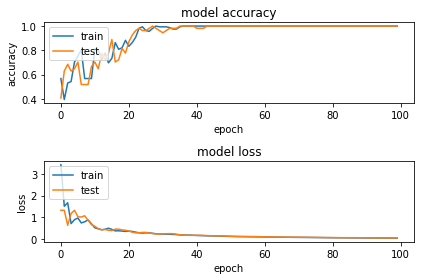

72/72 [==============================] - 0s 250us/step
Test loss: 0.030218138876888487
Test accuracy: 1.0


In [39]:
plt.figure(1)

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

score = model.evaluate(X, Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])